## 목표: SGD classifier 여러 테스트
- 여러 파라미터 사용 

# SGD classifier
----
- LogisticRegression에 SGD 경사하강법을 적용한 모델
- 필수 설정 파라미터
    - loss= __default__ : '__hinge__', 'log_loss', 'modified_huber', 'squared_hinge' 등
    - learning_rate = 'constant', __default__ : '__optimal__', 'invscaling', 'adaptive'
    

In [1]:
# 모듈 로딩
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

In [2]:
# 경고 무시
import warnings
warnings.filterwarnings(action='ignore')

In [4]:
fish = pd.read_csv('fish.csv')
fish

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [10]:
# 특성 데이터 + 타겟 분리
fish_input = fish[fish.columns[1:]].to_numpy()
fish_target = fish['Species'].to_numpy()

In [11]:
# 학습용, 테스트용 데이터 분리 -> 8:2
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

### 표준화 작업

In [12]:
# 표준화 평균 0, 표준편차 1
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

## 2. 모델 생성 및 함수
- 최적화 경사하강법이 변경된 상태(GD -> SGD)
- 손실 함수(loss function) 지정 필수

In [13]:
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


### partial_fit(): 1 epoch만 학습 진행  ( max_iter =1 인 경우)

In [14]:
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


In [53]:
pd.__version__, np.__version__
import sklearn
sklearn.__version__

'1.1.1'

In [44]:
# 최적의 함수횟수 찾기
def countft(num):
    train_list=[]; test_list=[]
    sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
    sc.fit(train_scaled, train_target)
    for i in range(num):
        sc.partial_fit(train_scaled, train_target)
        train_list.append(sc.score(train_scaled, train_target))
        test_list.append(sc.score(test_scaled, test_target))
    return train_list, test_list

train_list, test_list = countft(100)

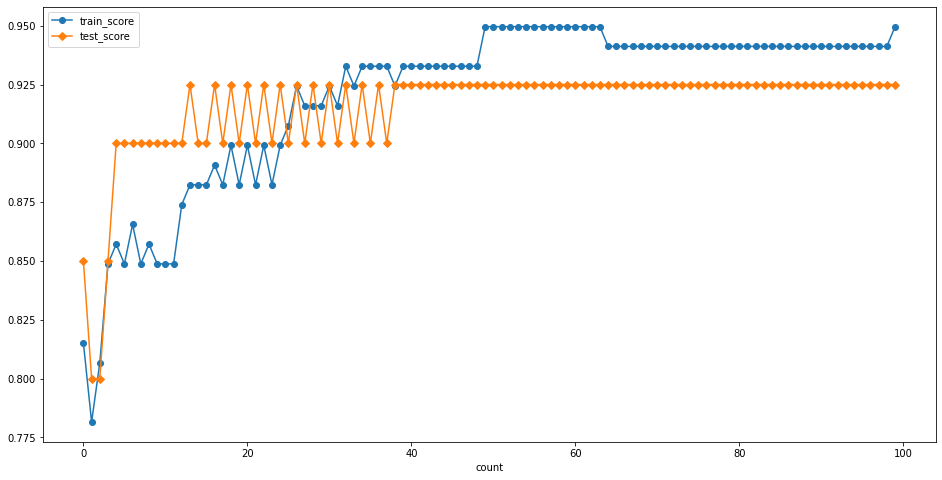

In [45]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16,8)
plt.plot(list(range(100)), train_list, marker='o')
plt.plot(list(range(100)), test_list, marker='D')
plt.xlabel('count')
plt.legend(['train_score','test_score'])
plt.show()

### 교수님 버전

In [55]:
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)

train_score = []
test_score = []


# target의 분류항목을 알려줌
classes = np.unique(train_target)
classes

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [56]:
for _ in range(0,300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_list.append(sc.score(train_scaled, train_target))
    test_list.append(sc.score(test_scaled, test_target))

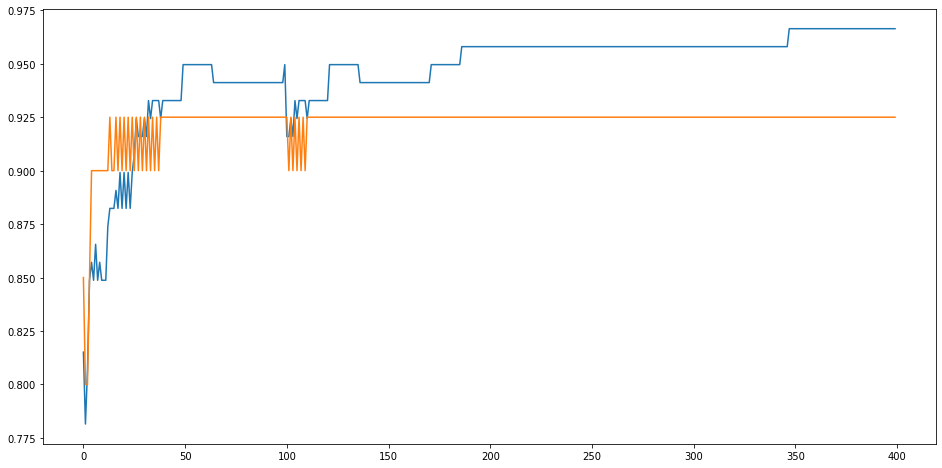

In [57]:
plt.plot(train_list)
plt.plot(test_list)

plt.show()

### early_stopping : 조기종료여부(default. False)
### n_iter_no_change : n번 동안 변경되지 않은 경우 early_stopping이 True
### tol : 성능 개선의 기준값

- early_stopping, n_iter_no_change, tol 3가지 파라미터를 이용해서 조기 종료를 시킬 수 있음

In [61]:
sc = SGDClassifier(loss='log_loss', tol=0.001, random_state=42, n_iter_no_change=10, early_stopping=True)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))


print(sc.n_iter_) # 모델이 반복한 횟수가 저장됨

0.8067226890756303
0.85
16
